In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/sivakumar/Data Files/netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
#checking the shape of the data
df.shape

(8807, 12)

In [5]:
#getting the Data types of values in our data
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
#getting basic overview of the data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
#checking No. of Unique values in our data
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
#checking No. of Null values in our data
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#Getting the Value count of each type of ratings
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [10]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Director
c = df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new = pd.DataFrame(c,index=df['title'])
df_new = df_new.stack()
df_new=pd.DataFrame(df_new.reset_index()) 
df_new.rename (columns={0 : 'Directors'}, inplace=True) 
df_new.drop(['level_1'],axis=1,inplace=True) 
df_new.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [11]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Cast
c2 = df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2 = pd.DataFrame(c2,index=df['title'])
df_new2 = df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index()) 
df_new2.rename (columns={0 : 'Actors'}, inplace=True) 
df_new2.drop(['level_1'],axis=1,inplace=True) 
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [12]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Listed_In
c2 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3 = pd.DataFrame(c2,index=df['title'])
df_new3 = df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index()) 
df_new3.rename (columns={0 : 'Genre'}, inplace=True) 
df_new3.drop(['level_1'],axis=1,inplace=True) 
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [13]:
#Here we are un-nesetting the the data, creating the new line for each. 
#In this case we are doing for Country
c2 = df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4 = pd.DataFrame(c2,index=df['title'])
df_new4 = df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index()) 
df_new4.rename (columns={0 : 'Country'}, inplace=True) 
df_new4.drop(['level_1'],axis=1,inplace=True) 
df_new4.head()

,title,Country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [14]:
#Now Merging all the Un-Merged Data
#Merging the data with Directors and Actors on Title 
df_new5 = df_new.merge(df_new2, on=['title'], how = 'inner')
#Merging the data with above merged data with Genre
df_new6 = df_new5.merge(df_new3, on=['title'], how = 'inner')
#Merging the data with above merged data with country
df_new = df_new6.merge(df_new4, on = ['title'], how = 'inner')
#Replacing the NaN values of Director and Actor
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Directors'],inplace=True)
df_new['Country'].replace(['nan'],['UnKnown Country'],inplace=True)
df_new.head()

,title,Directors,Actors,Genre,Country
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa


In [15]:
df_final = df_new.merge(df[['show_id','type','title','date_added','release_year',
                           'rating','duration']], on=['title'], how='left')
df_final.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [16]:
df_final.shape

(201991, 11)

In [17]:
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating           67
duration          3
dtype: int64

In [18]:
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])

In [19]:
df_final.loc[df_final['rating'].str.contains('min', na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)
df_final.isnull().sum()

title             0
Directors         0
Actors            0
Genre             0
Country           0
show_id           0
type              0
date_added      158
release_year      0
rating            0
duration          0
dtype: int64

In [20]:
df_final['rating'].value_counts()

TV-MA       73867
TV-14       43931
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1643
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
Name: rating, dtype: int64

In [21]:
df_final[df_final['date_added'].isnull()].head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Unknown Directors,Daniel Radcliffe,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Unknown Directors,Daniel Radcliffe,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Unknown Directors,Daniel Radcliffe,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Unknown Directors,Jon Hamm,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Unknown Directors,Jon Hamm,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [22]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    im = df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(im)

In [23]:
df_final

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201987,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [24]:
df_final[df_final['duration'].isnull()].head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration


In [25]:
df_final['duration'] = df_final['duration'].str.replace(' min','')
df_final.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [26]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1 = df_final.copy()

In [27]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy'] = df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [29]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

/var/folders/2k/nqxlqww13nd99192zjdnsjc00000gn/T/ipykernel_8039/1638109463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_final1['duration_copy'], hist = True, kde =True,


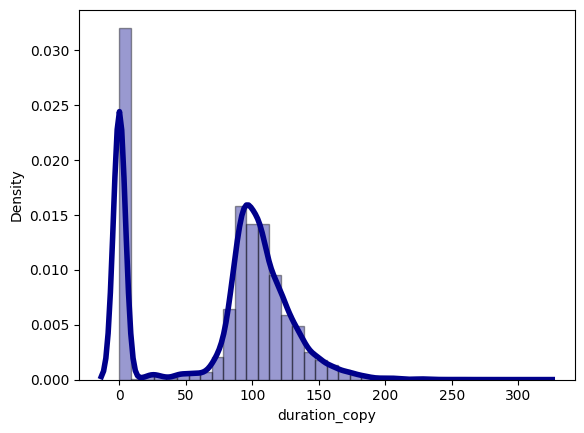

In [33]:
sns.distplot(df_final1['duration_copy'], hist = True, kde =True,
            bins=int(36), color = 'darkblue',
            hist_kws={'edgecolor': 'black'},
            kde_kws={'linewidth':4})
plt.show()

In [34]:
bins1 = [-1,1,50,80,100,120,150,200,315]
labels1 = ['<1', '1-50', '50-80', '80-100', '100-120', '120-150', '150-200', '200-315']
df_final1['duration copy'] = pd.cut(df_final1['duration_copy'],bins=bins1, labels=labels1)
df_final1.head( )


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy,duration copy
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,80-100
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1


In [44]:
from datetime import datetime
from dateutil.parser import parse 
arr=[]
for i in df_final1['date_added' ].values:
    dt1=parse (i)
    arr.append(dt1.strftime('%Y-%m-%d'))
df_final1[ 'Modified_Added_date'] =arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1[ 'Modified_Added_date'].dt.month 
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head( )

/var/folders/2k/nqxlqww13nd99192zjdnsjc00000gn/T/ipykernel_8039/927289177.py:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy,duration copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021


In [45]:
df_final1['title'] = df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

/var/folders/2k/nqxlqww13nd99192zjdnsjc00000gn/T/ipykernel_8039/1303496868.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_final1['title'] = df_final1['title'].str.replace(r"\(.*\)","")


,title,Directors,Actors,Genre,Country,show_id,type,date_added,release_year,rating,duration,duration_copy,duration copy,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,80-100,2021-09-25,9,38,2021
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,<1,2021-09-24,9,38,2021


In [46]:
df_final1.groupby(['Genre']).agg({'title':'unique'})

,title
Genre,
Action & Adventure,"[The Stronghold, Birth of the Dragon, Jaws, Ja..."
Anime Features,[InuYasha the Movie 2: The Castle Beyond the L...
Anime Series,"[Yowamushi Pedal, Pokémon Master Journeys: The..."
British TV Shows,"[The Great British Baking Show, Crime Stories:..."
Children & Family Movies,"[My Little Pony: A New Generation, Confessions..."
Classic & Cult TV,"[The Walking Dead, Okupas, A Perfect Day For A..."
Classic Movies,"[Jaws, Blade Runner: The Final Cut, Do the Rig..."
Comedies,"[The Starling, Confessions of an Invisible Gir..."
Crime TV Shows,"[Ganglands, Vendetta: Truth, Lies and The Mafi..."


In [47]:
df_final1.groupby(['Genre']).agg({'title':'nunique'})

,title
Genre,
Action & Adventure,854
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,639
Classic & Cult TV,28
Classic Movies,116
Comedies,1673
Crime TV Shows,470


In [ ]:
df_genre = df_final1.groupby()